In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from scipy import stats

In [397]:
df1 = pd.read_csv('Merged_File.csv')
products = pd.read_csv('Product_Details.csv')

In [398]:
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,PACKET_SIZE,PP_RATE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,NCC,175,3.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs,175,2.1
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,170,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths,175,3.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle,150,4.6


In [399]:
products.head()

,PROD_NBR,PROD_NAME,TOT_SALES,PROD_QTY,PP_RATE,PACKET_SIZE,BRAND
0,1,Smiths Crinkle Cut Chips Barbecue 170g,8125.8,2802,2.90,170,Smiths
1,2,Cobs Popd Sour Crm &Chives Chips 110g,22944.4,6038,3.80,110,Cobs
2,3,Kettle Sensations Camembert & Fig 150g,28308.4,6157,4.60,150,Kettle
3,4,Dorito Corn Chp Supreme 380g,39052.0,6109,6.39,380,Doritos
4,5,Natural Chip Compny SeaSalt175g,8331.0,2777,3.00,175,NCC


In [400]:
df1['DATE'] = pd.to_datetime(df1['DATE'])

In [401]:
df1.dtypes

DATE                datetime64[ns]
STORE_NBR                    int64
LYLTY_CARD_NBR               int64
TXN_ID                       int64
PROD_NBR                     int64
PROD_NAME                   object
PROD_QTY                     int64
TOT_SALES                  float64
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
BRAND                       object
PACKET_SIZE                  int64
PP_RATE                    float64
dtype: object

### Test Stores Data

In [402]:
test = df1[df1['STORE_NBR'] == 77]
test = pd.concat([test, df1[df1['STORE_NBR'] == 86], df1[df1['STORE_NBR'] == 88]])
test.sort_values(by = ['DATE'], inplace = True)

In [403]:
test.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,PACKET_SIZE,PP_RATE
8551,2018-07-01,88,88076,86585,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,MIDAGE SINGLES/COUPLES,Mainstream,Kettle,150,4.6
205464,2018-07-01,88,88102,86731,40,Thins Chips Seasonedchicken 175g,2,6.6,YOUNG FAMILIES,Premium,Thins,175,3.3
164486,2018-07-01,88,88283,87636,112,Tyrrells Crisps Ched & Chives 165g,2,8.4,RETIREES,Premium,Tyrrells,165,4.2
115044,2018-07-01,88,88053,86480,49,Infuzions SourCream&Herbs Veg Strws 110g,2,7.6,OLDER SINGLES/COUPLES,Premium,Infuzions,110,3.8
146785,2018-07-01,86,86016,84237,48,Red Rock Deli Sp Salt & Truffle 150G,2,5.4,RETIREES,Mainstream,Red,150,2.7


In [404]:
test['YEAR_MONTH'] = (test['DATE'].dt.year)*100 + (test['DATE'].dt.month)
test.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,PACKET_SIZE,PP_RATE,YEAR_MONTH
8551,2018-07-01,88,88076,86585,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,MIDAGE SINGLES/COUPLES,Mainstream,Kettle,150,4.6,201807
205464,2018-07-01,88,88102,86731,40,Thins Chips Seasonedchicken 175g,2,6.6,YOUNG FAMILIES,Premium,Thins,175,3.3,201807
164486,2018-07-01,88,88283,87636,112,Tyrrells Crisps Ched & Chives 165g,2,8.4,RETIREES,Premium,Tyrrells,165,4.2,201807
115044,2018-07-01,88,88053,86480,49,Infuzions SourCream&Herbs Veg Strws 110g,2,7.6,OLDER SINGLES/COUPLES,Premium,Infuzions,110,3.8,201807
146785,2018-07-01,86,86016,84237,48,Red Rock Deli Sp Salt & Truffle 150G,2,5.4,RETIREES,Mainstream,Red,150,2.7,201807


#### Adding Metrics

In [405]:
# Calculating Total Sales per Month
test_store_month = (test.groupby(['STORE_NBR', 'YEAR_MONTH'])['TOT_SALES'].sum().reset_index())

In [406]:
# Calculating Number of Customers per Month
x = test.groupby(['STORE_NBR', 'YEAR_MONTH'])['LYLTY_CARD_NBR'].unique()
nCust = {
    'STORE_NBR' : [],
    'YEAR_MONTH': [],
    'CUST_COUNT' : []
}
for i in zip(test_store_month['STORE_NBR'], test_store_month['YEAR_MONTH'], x):
    nCust['STORE_NBR'] += [i[0]]
    nCust['YEAR_MONTH'] += [i[1]]
    nCust['CUST_COUNT'] += [len(i[2])]
cust_count = pd.DataFrame.from_dict(nCust)
cust_count.head()

,STORE_NBR,YEAR_MONTH,CUST_COUNT
0,77,201807,47
1,77,201808,46
2,77,201809,40
3,77,201810,36
4,77,201811,39


In [407]:
# Merging Customer Count with Monthly Store Data
test_store_month = pd.merge(test_store_month, cust_count, left_on = ['STORE_NBR', 'YEAR_MONTH'], 
                            right_on = ['STORE_NBR', 'YEAR_MONTH'], how = 'left')

In [408]:
# Calculating Transactions per Customer Per Month
test_cust_txn = test.groupby(['STORE_NBR', 'YEAR_MONTH'])['TXN_ID'].count().reset_index()
test_cust_txn.head()

,STORE_NBR,YEAR_MONTH,TXN_ID
0,77,201807,51
1,77,201808,46
2,77,201809,42
3,77,201810,37
4,77,201811,42


In [409]:
# Merging Transaction Count to Monthly Store Data
test_store_month = pd.merge(test_store_month, test_cust_txn, left_on = ['STORE_NBR', 'YEAR_MONTH'], 
                            right_on = ['STORE_NBR', 'YEAR_MONTH'], how = 'right')

In [410]:
# Renaming Columns
test_store_month.rename(columns = {'TXN_ID' : 'TOTAL_TXN', 'TOT_SALES' : 'MONTH_SALES'}, inplace = True)

In [411]:
test_store_month['TXN_PER_CUST'] = test_store_month['TOTAL_TXN']/test_store_month['CUST_COUNT']
test_store_month.head()

,STORE_NBR,YEAR_MONTH,MONTH_SALES,CUST_COUNT,TOTAL_TXN,TXN_PER_CUST
0,77,201807,268.4,47,51,1.085106
1,77,201808,247.5,46,46,1.000000
2,77,201809,216.8,40,42,1.050000
3,77,201810,194.3,36,37,1.027778
4,77,201811,224.9,39,42,1.076923


In [412]:
# Calculating Total Purchase of Chips
test_store_month['TOTAL_PROD'] = (test.groupby(['STORE_NBR', 'YEAR_MONTH'])['PROD_QTY'].sum().reset_index())['PROD_QTY']

In [413]:
# Calculating Chips per Transaction
test_store_month['PROD_PER_TXN'] = (test.groupby(['STORE_NBR', 'YEAR_MONTH'])['PROD_QTY'].mean().reset_index())['PROD_QTY']

In [414]:
# Calculating Chips per Customer
test_store_month['AVG_PP_RATE'] = test_store_month['MONTH_SALES']/test_store_month['TOTAL_PROD']

In [415]:
test_store_month.head()

,STORE_NBR,YEAR_MONTH,MONTH_SALES,CUST_COUNT,TOTAL_TXN,TXN_PER_CUST,TOTAL_PROD,PROD_PER_TXN,AVG_PP_RATE
0,77,201807,268.4,47,51,1.085106,77,1.509804,3.485714
1,77,201808,247.5,46,46,1.000000,71,1.543478,3.485915
2,77,201809,216.8,40,42,1.050000,66,1.571429,3.284848
3,77,201810,194.3,36,37,1.027778,50,1.351351,3.886000
4,77,201811,224.9,39,42,1.076923,63,1.500000,3.569841


In [416]:
test_store_month.drop(['TOTAL_TXN', 'TOTAL_PROD'], axis = 1, inplace = True)

### Control Stores Data

control1 = df1[(df1['DATE'].dt.month < 2)]
control1 = pd.concat([control1, df1[(df1['DATE'].dt.year < 2019)]])
control1.sort_values(by = ['DATE'], inplace = True)

In [417]:
filt1 = df1[df1['STORE_NBR'] == 77]
control1 = df1
control1.drop(test.index, axis = 0, inplace = True)

In [418]:
control1['YEAR_MONTH'] = (control1['DATE'].dt.year)*100 + (control1['DATE'].dt.month)
control1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,PACKET_SIZE,PP_RATE,YEAR_MONTH
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,NCC,175,3.0,201810
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs,175,2.1,201905
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,170,2.9,201905
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths,175,3.0,201808
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle,150,4.6,201808


In [419]:
control1.to_csv('Control_Stores.csv', index = False)

#### Adding Metrics

In [420]:
# Calculating Total Sales per Month
store_month = (control1.groupby(['STORE_NBR', 'YEAR_MONTH'])['TOT_SALES'].sum().reset_index())

In [421]:
# Calculating Number of Customers per Month
x = control1.groupby(['STORE_NBR', 'YEAR_MONTH'])['LYLTY_CARD_NBR'].unique()
nCust = {
    'STORE_NBR' : [],
    'YEAR_MONTH': [],
    'CUST_COUNT' : []
}
for i in zip(store_month['STORE_NBR'], store_month['YEAR_MONTH'], x):
    nCust['STORE_NBR'] += [i[0]]
    nCust['YEAR_MONTH'] += [i[1]]
    nCust['CUST_COUNT'] += [len(i[2])]
cust_count = pd.DataFrame.from_dict(nCust)
cust_count.head()

,STORE_NBR,YEAR_MONTH,CUST_COUNT
0,1,201807,47
1,1,201808,41
2,1,201809,57
3,1,201810,39
4,1,201811,44


In [422]:
# Merging Customer Count to Monthly Store Data
store_month = pd.merge(store_month, cust_count, left_on = ['STORE_NBR', 'YEAR_MONTH'], right_on = ['STORE_NBR', 'YEAR_MONTH'], how = 'left')

In [423]:
# Calculating Transactions per Customer Per Month
# cust_txn = control1.groupby(['STORE_NBR', 'YEAR_MONTH', 'LYLTY_CARD_NBR'])['TXN_ID'].count().reset_index()
# cust_txn.head()

In [424]:
# Calculating Transactions per Customer Per Month
cust_txn = control1.groupby(['STORE_NBR', 'YEAR_MONTH'])['TXN_ID'].count().reset_index()
cust_txn.head()

,STORE_NBR,YEAR_MONTH,TXN_ID
0,1,201807,49
1,1,201808,41
2,1,201809,59
3,1,201810,40
4,1,201811,45


In [425]:
# Merging to Monthly Store Data
store_month = pd.merge(store_month, cust_txn, left_on = ['STORE_NBR', 'YEAR_MONTH'], right_on = ['STORE_NBR', 'YEAR_MONTH'], how = 'right')
store_month.head()

,STORE_NBR,YEAR_MONTH,TOT_SALES,CUST_COUNT,TXN_ID
0,1,201807,188.9,47,49
1,1,201808,168.4,41,41
2,1,201809,268.1,57,59
3,1,201810,175.4,39,40
4,1,201811,184.8,44,45


In [426]:
# Renaming Columns
store_month.rename(columns = {'TXN_ID' : 'TOTAL_TXN', 'TOT_SALES' : 'MONTH_SALES'}, inplace = True)

In [427]:
store_month['TXN_PER_CUST'] = store_month['TOTAL_TXN']/store_month['CUST_COUNT']
store_month.head()

,STORE_NBR,YEAR_MONTH,MONTH_SALES,CUST_COUNT,TOTAL_TXN,TXN_PER_CUST
0,1,201807,188.9,47,49,1.042553
1,1,201808,168.4,41,41,1.000000
2,1,201809,268.1,57,59,1.035088
3,1,201810,175.4,39,40,1.025641
4,1,201811,184.8,44,45,1.022727


In [428]:
# Calculating Total Purchase of Chips
store_month['TOTAL_PROD'] = (control1.groupby(['STORE_NBR', 'YEAR_MONTH'])['PROD_QTY'].sum().reset_index())['PROD_QTY']

In [429]:
# Calculating Chips Per Transaction
store_month['PROD_PER_TXN'] = (control1.groupby(['STORE_NBR', 'YEAR_MONTH'])['PROD_QTY'].mean().reset_index())['PROD_QTY']

In [430]:
# Calculating Chips per Customer
store_month['AVG_PP_RATE'] = store_month['MONTH_SALES']/store_month['TOTAL_PROD']

In [431]:
store_month.tail()

,STORE_NBR,YEAR_MONTH,MONTH_SALES,CUST_COUNT,TOTAL_TXN,TXN_PER_CUST,TOTAL_PROD,PROD_PER_TXN,AVG_PP_RATE
3124,272,201902,385.3,44,47,1.068182,89,1.893617,4.329213
3125,272,201903,421.9,48,51,1.062500,97,1.901961,4.349485
3126,272,201904,445.1,54,56,1.037037,105,1.875000,4.239048
3127,272,201905,314.6,34,40,1.176471,71,1.775000,4.430986
3128,272,201906,301.9,33,36,1.090909,68,1.888889,4.439706


In [432]:
store_month.drop(['TOTAL_TXN', 'TOTAL_PROD'], axis = 1, inplace = True)

In [433]:
filt_stores = store_month.groupby('STORE_NBR', as_index = False)['YEAR_MONTH'].count()
filt = filt_stores[filt_stores['YEAR_MONTH'] != 12]
for i in filt['STORE_NBR']:
    ind = store_month[store_month['STORE_NBR'] == i].index
    store_month.drop(ind, axis = 0, inplace = True)

## Test vs Control Stores Evaluation

### Correlation

**Function for correlation calculation**

In [434]:
def corr_calc(store_month, test_month, st_no, test_no, out_dic):
    x1 = store_month[store_month['STORE_NBR'] == st_no]
    y1 = test_month[test_month['STORE_NBR'] == test_no]
    for rec in (out_dic):
        if rec == 'STORE_NBR':
            out_dic[rec] += [st_no]
        else:
            coef, pval = stats.pearsonr(list(x1[rec]), list(y1[rec]))
            out_dic[rec] += [coef]
    return out_dic

**Pre-Trial Dataset**

In [435]:
pre_trial_store = store_month[store_month['YEAR_MONTH'] < 201902]

In [436]:
pre_trial_test = test_store_month[test_store_month['YEAR_MONTH'] < 201902]

In [437]:
pre_trial_store.head()

,STORE_NBR,YEAR_MONTH,MONTH_SALES,CUST_COUNT,TXN_PER_CUST,PROD_PER_TXN,AVG_PP_RATE
0,1,201807,188.9,47,1.042553,1.183673,3.256897
1,1,201808,168.4,41,1.000000,1.268293,3.238462
2,1,201809,268.1,57,1.035088,1.203390,3.776056
3,1,201810,175.4,39,1.025641,1.275000,3.439216
4,1,201811,184.8,44,1.022727,1.222222,3.360000


#### Test Store 77 Correlation Calculation

In [438]:
corr_dic = {
        'STORE_NBR' : [],
        'YEAR_MONTH' : [],
        'MONTH_SALES' : [],
        'CUST_COUNT' : []
        # 'TXN_PER_CUST' : [],
        # 'PROD_PER_TXN' : [],
        # 'AVG_PP_RATE' : []
}
for i in pre_trial_store['STORE_NBR'].unique():
    corr_dic = corr_calc(pre_trial_store, pre_trial_test, i, 77, corr_dic)
corr_77 = pd.DataFrame.from_dict(corr_dic)

In [439]:
corr_77.head()

,STORE_NBR,YEAR_MONTH,MONTH_SALES,CUST_COUNT
0,1,1.0,-0.005382,0.337866
1,2,1.0,-0.251183,-0.596492
2,3,1.0,0.660447,0.755249
3,4,1.0,-0.347846,-0.305412
4,5,1.0,-0.139048,0.224768


#### Test Store 86 Correlation Calculation

In [440]:
corr_dic = {
        'STORE_NBR' : [],
        'YEAR_MONTH' : [],
        'MONTH_SALES' : [],
        'CUST_COUNT' : []
}
for i in pre_trial_store['STORE_NBR'].unique():
    corr_dic = corr_calc(pre_trial_store, pre_trial_test, i, 86, corr_dic)
corr_86 = pd.DataFrame.from_dict(corr_dic)

In [441]:
corr_86.head()

,STORE_NBR,YEAR_MONTH,MONTH_SALES,CUST_COUNT
0,1,1.0,0.364734,0.384379
1,2,1.0,-0.526492,-0.064384
2,3,1.0,0.139789,0.063780
3,4,1.0,0.035618,-0.006242
4,5,1.0,0.446823,0.099456


#### Test Store 88 Correlation Calculation

In [442]:
corr_dic = {
        'STORE_NBR' : [],
        'YEAR_MONTH' : [],
        'MONTH_SALES' : [],
        'CUST_COUNT' : []
}
for i in pre_trial_store['STORE_NBR'].unique():
    corr_dic = corr_calc(pre_trial_store, pre_trial_test, i, 88, corr_dic)
corr_88 = pd.DataFrame.from_dict(corr_dic)

In [443]:
corr_88.head()

,STORE_NBR,YEAR_MONTH,MONTH_SALES,CUST_COUNT
0,1,1.0,0.842232,0.429977
1,2,1.0,-0.232494,-0.547400
2,3,1.0,-0.467330,0.434080
3,4,1.0,-0.506130,-0.216778
4,5,1.0,0.338525,-0.026535


## Magnitude Distance

**Function for Magnitude Distance Calculation**

In [444]:
def mag_calc(control, test, st_no, test_no, out):
    x1 = test[test['STORE_NBR'] == test_no]
    y1 = control[control['STORE_NBR'] == st_no]
    for col in out:
        for rec1, rec2 in zip(x1[col], y1[col]):
            if col == 'STORE_NBR' or col == 'YEAR_MONTH':
                out[col] += [rec2]
            else:
                out[col] += [abs(rec1-rec2)]
    return out

#### Test Store 77 Magnitude Distance

In [445]:
mag_dic = {
        'STORE_NBR' : [],
        'YEAR_MONTH' : [],
        'MONTH_SALES' : [],
        'CUST_COUNT' : []
}
for i in pre_trial_store['STORE_NBR'].unique():
    mag_dic = mag_calc(pre_trial_store, pre_trial_test, i, 77, mag_dic)
mag_77 = pd.DataFrame.from_dict(mag_dic)

In [446]:
mag_77.head()

,STORE_NBR,YEAR_MONTH,MONTH_SALES,CUST_COUNT
0,1,201807,79.5,0
1,1,201808,79.1,5
2,1,201809,51.3,17
3,1,201810,18.9,3
4,1,201811,40.1,5


#### Test Store 86 Magnitude Distance

In [447]:
mag_dic = {
        'STORE_NBR' : [],
        'YEAR_MONTH' : [],
        'MONTH_SALES' : [],
        'CUST_COUNT' : []
}
for i in pre_trial_store['STORE_NBR'].unique():
    mag_dic = mag_calc(pre_trial_store, pre_trial_test, i, 86, mag_dic)
mag_86 = pd.DataFrame.from_dict(mag_dic)

In [448]:
mag_86.head()

,STORE_NBR,YEAR_MONTH,MONTH_SALES,CUST_COUNT
0,1,201807,662.10,47
1,1,201808,558.45,51
2,1,201809,586.90,43
3,1,201810,723.40,66
4,1,201811,666.40,51


#### Test Store 88 Magnitude Distance

In [449]:
mag_dic = {
        'STORE_NBR' : [],
        'YEAR_MONTH' : [],
        'MONTH_SALES' : [],
        'CUST_COUNT' : []
}
for i in pre_trial_store['STORE_NBR'].unique():
    mag_dic = mag_calc(pre_trial_store, pre_trial_test, i, 88, mag_dic)
mag_88 = pd.DataFrame.from_dict(mag_dic)

In [450]:
mag_88.tail()

,STORE_NBR,YEAR_MONTH,MONTH_SALES,CUST_COUNT
1787,272,201809,1067.3,90
1788,272,201810,865.7,79
1789,272,201811,955.6,84
1790,272,201812,849.9,77
1791,272,201901,823.0,71


**Function for Standardising Magnitude Distance**

In [451]:
def stand_mag(mag, st_no, out):
    y1 = mag[mag['STORE_NBR'] == st_no]
    for col in out:
        for rec in y1[col]:
            if col == 'STORE_NBR' or col == 'YEAR_MONTH':
                out[col] += [rec]
            else:
                max_dist = y1[col].max()
                min_dist = y1[col].min()
                out[col] += [(rec-min_dist)/(max_dist-min_dist)]
    return out

In [452]:
mag_dic = {
        'STORE_NBR' : [],
        'YEAR_MONTH' : [],
        'MONTH_SALES' : [],
        'CUST_COUNT' : []
}
for i in pre_trial_store['STORE_NBR'].unique():
    mag_dic = stand_mag(mag_77, i, mag_dic)
stand_mag_77 = pd.DataFrame.from_dict(mag_dic)

In [453]:
stand_mag_77.head()

,STORE_NBR,YEAR_MONTH,MONTH_SALES,CUST_COUNT
0,1,201807,0.800528,0.000000
1,1,201808,0.795244,0.294118
2,1,201809,0.428005,1.000000
3,1,201810,0.000000,0.176471
4,1,201811,0.280053,0.294118


In [454]:
mag_dic = {
        'STORE_NBR' : [],
        'YEAR_MONTH' : [],
        'MONTH_SALES' : [],
        'CUST_COUNT' : []
}
for i in pre_trial_store['STORE_NBR'].unique():
    mag_dic = stand_mag(mag_86, i, mag_dic)
stand_mag_86 = pd.DataFrame.from_dict(mag_dic)

In [455]:
stand_mag_86.head()

,STORE_NBR,YEAR_MONTH,MONTH_SALES,CUST_COUNT
0,1,201807,0.628372,0.173913
1,1,201808,0.000000,0.347826
2,1,201809,0.172477,0.000000
3,1,201810,1.000000,1.000000
4,1,201811,0.654441,0.347826


In [456]:
mag_dic = {
        'STORE_NBR' : [],
        'YEAR_MONTH' : [],
        'MONTH_SALES' : [],
        'CUST_COUNT' : []
}
for i in pre_trial_store['STORE_NBR'].unique():
    mag_dic = stand_mag(mag_88, i, mag_dic)
stand_mag_88 = pd.DataFrame.from_dict(mag_dic)

In [457]:
stand_mag_88.head()

,STORE_NBR,YEAR_MONTH,MONTH_SALES,CUST_COUNT
0,1,201807,0.000000,0.65
1,1,201808,0.457348,1.00
2,1,201809,0.661871,0.00
3,1,201810,0.679342,0.85
4,1,201811,1.000000,0.75


## Average Score

**Function for calculation of Average Score**

In [458]:
def avg_score(mag, st_no, out):
    y1 = mag[mag['STORE_NBR'] == st_no]
    for col in out:
        if col == 'STORE_NBR':
            for rec in y1[col]:
                out[col] += [rec]
        else:
            for rec1, rec2 in zip(y1[col+'_x'], y1[col+'_y']):
                if col == 'YEAR_MONTH':
                    out[col] += [rec1]
                else:
                    out[col] += [(rec1 + rec2)/2]
    return out

#### Test Store 77 Score

In [459]:
merge_77 = pd.merge(stand_mag_77, corr_77, left_on = 'STORE_NBR', right_on = 'STORE_NBR', how = 'left')

In [460]:
merge_77.head()

,STORE_NBR,YEAR_MONTH_x,MONTH_SALES_x,CUST_COUNT_x,YEAR_MONTH_y,MONTH_SALES_y,CUST_COUNT_y
0,1,201807,0.800528,0.000000,1.0,-0.005382,0.337866
1,1,201808,0.795244,0.294118,1.0,-0.005382,0.337866
2,1,201809,0.428005,1.000000,1.0,-0.005382,0.337866
3,1,201810,0.000000,0.176471,1.0,-0.005382,0.337866
4,1,201811,0.280053,0.294118,1.0,-0.005382,0.337866


In [461]:
score_dic = {
        'STORE_NBR' : [],
        'YEAR_MONTH' : [],
        'MONTH_SALES' : [],
        'CUST_COUNT' : []
}
for i in merge_77['STORE_NBR'].unique():
    score_dic = avg_score(merge_77, i, score_dic)
score_77 = pd.DataFrame.from_dict(score_dic)

In [462]:
score_77.sort_values(by = ['CUST_COUNT', 'MONTH_SALES'], ascending = False, inplace = True)

In [463]:
score_77.head()

,STORE_NBR,YEAR_MONTH,MONTH_SALES,CUST_COUNT
1522,233,201810,0.945511,0.982841
762,119,201901,0.845739,0.959532
726,113,201812,0.800323,0.950815
1659,254,201807,0.792436,0.950805
1662,254,201810,0.495485,0.950805


In [464]:
score_77[score_77['STORE_NBR'] == 233]

,STORE_NBR,YEAR_MONTH,MONTH_SALES,CUST_COUNT
1522,233,201810,0.945511,0.982841
1520,233,201808,0.634970,0.732841
1525,233,201901,0.986821,0.482841
1523,233,201811,0.709044,0.482841
1524,233,201812,0.592235,0.482841
1521,233,201809,0.505340,0.482841
1519,233,201807,0.486821,0.482841


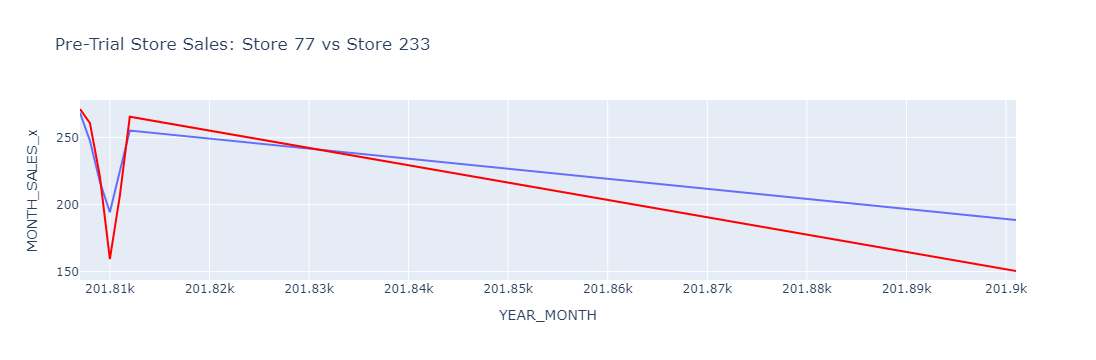

In [465]:
x1 = pd.merge(pre_trial_test[pre_trial_test['STORE_NBR'] == 77], pre_trial_store[pre_trial_store['STORE_NBR'] == 233], 
              left_on = ['YEAR_MONTH'], right_on = ['YEAR_MONTH'], how = 'left')
fig = px.line(x1, x = 'YEAR_MONTH', y = 'MONTH_SALES_x', title = 'Pre-Trial Store Sales: Store 77 vs Store 233')
fig2 = px.line(x1, x = 'YEAR_MONTH', y = 'MONTH_SALES_y')
fig2.update_traces(line_color = 'red')
fig.add_trace(fig2.data[0])
fig.show()

In [466]:
fig = px.line(x1, x = 'YEAR_MONTH', y = 'CUST_COUNT_x', title = 'Pre-Trial Store No. of Customers: Store 77 vs Store 233')
fig2 = px.line(x1, x = 'YEAR_MONTH', y = 'CUST_COUNT_y')
fig2.update_traces(line_color = 'red')
fig.add_trace(fig2.data[0])
fig.show()

#### Test Store 86 Score

In [467]:
merge_86 = pd.merge(stand_mag_86, corr_86, left_on = 'STORE_NBR', right_on = 'STORE_NBR', how = 'left')

In [468]:
merge_86.head()

,STORE_NBR,YEAR_MONTH_x,MONTH_SALES_x,CUST_COUNT_x,YEAR_MONTH_y,MONTH_SALES_y,CUST_COUNT_y
0,1,201807,0.628372,0.173913,1.0,0.364734,0.384379
1,1,201808,0.000000,0.347826,1.0,0.364734,0.384379
2,1,201809,0.172477,0.000000,1.0,0.364734,0.384379
3,1,201810,1.000000,1.000000,1.0,0.364734,0.384379
4,1,201811,0.654441,0.347826,1.0,0.364734,0.384379


In [469]:
score_dic = {
        'STORE_NBR' : [],
        'YEAR_MONTH' : [],
        'MONTH_SALES' : [],
        'CUST_COUNT' : []
}
for i in merge_77['STORE_NBR'].unique():
    score_dic = avg_score(merge_86, i, score_dic)
score_86 = pd.DataFrame.from_dict(score_dic)

In [470]:
score_86.sort_values(by = ['MONTH_SALES', 'CUST_COUNT'], ascending = False, inplace = True)

In [471]:
score_86.head()

,STORE_NBR,YEAR_MONTH,MONTH_SALES,CUST_COUNT
1010,155,201809,0.934766,0.914543
850,132,201810,0.921316,0.730388
1707,260,201901,0.913816,0.739625
1703,260,201809,0.910720,0.872958
895,138,201901,0.898033,0.533191


In [472]:
score_86[score_86['STORE_NBR'] == 155]

,STORE_NBR,YEAR_MONTH,MONTH_SALES,CUST_COUNT
1010,155,201809,0.934766,0.914543
1008,155,201807,0.694216,0.914543
1014,155,201901,0.587000,0.789543
1012,155,201811,0.464663,0.539543
1011,155,201810,0.457790,0.414543
1013,155,201812,0.438546,0.664543
1009,155,201808,0.434766,0.914543


In [473]:
x1 = pd.merge(pre_trial_test[pre_trial_test['STORE_NBR'] == 86], pre_trial_store[pre_trial_store['STORE_NBR'] == 155], 
              left_on = ['YEAR_MONTH'], right_on = ['YEAR_MONTH'], how = 'left')
fig = px.line(x1, x = 'YEAR_MONTH', y = 'MONTH_SALES_x', title = 'Pre-Trial Store Sales: Store 86 vs Store 155')
fig2 = px.line(x1, x = 'YEAR_MONTH', y = 'MONTH_SALES_y')
fig2.update_traces(line_color = 'red')
fig.add_trace(fig2.data[0])
fig.show()

In [474]:
fig = px.line(x1, x = 'YEAR_MONTH', y = 'CUST_COUNT_x', title = 'Pre-Trial Store No. of Customers: Store 86 vs Store 155')
fig2 = px.line(x1, x = 'YEAR_MONTH', y = 'CUST_COUNT_y')
fig2.update_traces(line_color = 'red')
fig.add_trace(fig2.data[0])
fig.show()

#### Test Store 88 Score

In [475]:
merge_88 = pd.merge(stand_mag_88, corr_88, left_on = 'STORE_NBR', right_on = 'STORE_NBR', how = 'left')

In [476]:
merge_88.head()

,STORE_NBR,YEAR_MONTH_x,MONTH_SALES_x,CUST_COUNT_x,YEAR_MONTH_y,MONTH_SALES_y,CUST_COUNT_y
0,1,201807,0.000000,0.65,1.0,0.842232,0.429977
1,1,201808,0.457348,1.00,1.0,0.842232,0.429977
2,1,201809,0.661871,0.00,1.0,0.842232,0.429977
3,1,201810,0.679342,0.85,1.0,0.842232,0.429977
4,1,201811,1.000000,0.75,1.0,0.842232,0.429977


In [477]:
score_dic = {
        'STORE_NBR' : [],
        'YEAR_MONTH' : [],
        'MONTH_SALES' : [],
        'CUST_COUNT' : []
}
for i in merge_88['STORE_NBR'].unique():
    score_dic = avg_score(merge_88, i, score_dic)
score_88 = pd.DataFrame.from_dict(score_dic)

In [478]:
score_88.sort_values(by = ['MONTH_SALES'], ascending = False)

,STORE_NBR,YEAR_MONTH,MONTH_SALES,CUST_COUNT
1038,159,201809,0.969388,0.124630
577,91,201810,0.955993,0.544830
1339,204,201809,0.935985,0.354072
4,1,201811,0.921116,0.589989
1569,240,201808,0.908623,0.525304
...,...,...,...,...
1504,230,201901,-0.415816,0.244364
1538,235,201812,-0.417421,-0.119925
313,48,201812,-0.443641,0.391774
152,23,201812,-0.445786,0.096284


In [479]:
score_88.sort_values(by = ['CUST_COUNT'], ascending = False).head(25)

,STORE_NBR,YEAR_MONTH,MONTH_SALES,CUST_COUNT
85,14,201808,0.288033,0.983682
84,14,201807,0.239567,0.983682
1548,237,201808,0.283345,0.979448
1164,178,201809,0.601299,0.954182
1168,178,201901,0.507744,0.954182
377,57,201901,0.061827,0.896445
1522,233,201810,0.331969,0.891934
228,35,201811,0.205737,0.877655
759,119,201810,0.350259,0.871565
86,14,201809,0.739567,0.858682


In [480]:
score_88[score_88['STORE_NBR'] == 1]

,STORE_NBR,YEAR_MONTH,MONTH_SALES,CUST_COUNT
0,1,201807,0.421116,0.539989
1,1,201808,0.649790,0.714989
2,1,201809,0.752051,0.214989
3,1,201810,0.760787,0.639989
4,1,201811,0.921116,0.589989
5,1,201812,0.539821,0.689989
6,1,201901,0.608167,0.614989


In [481]:
x1 = pd.merge(pre_trial_test[pre_trial_test['STORE_NBR'] == 88], pre_trial_store[pre_trial_store['STORE_NBR'] == 91], 
              left_on = ['YEAR_MONTH'], right_on = ['YEAR_MONTH'], how = 'left')
fig = px.line(x1, x = 'YEAR_MONTH', y = 'MONTH_SALES_x', title = 'Pre-Trial Store Sales: Store 88 vs Store 1')
fig2 = px.line(x1, x = 'YEAR_MONTH', y = 'MONTH_SALES_y')
fig2.update_traces(line_color = 'red')
fig.add_trace(fig2.data[0])
fig.show()

In [482]:
fig = px.line(x1, x = 'YEAR_MONTH', y = 'CUST_COUNT_x', title = 'Pre-Trial Store No. of Customers: Store 88 vs Store 1')
fig2 = px.line(x1, x = 'YEAR_MONTH', y = 'CUST_COUNT_y')
fig2.update_traces(line_color = 'red')
fig.add_trace(fig2.data[0])
fig.show()

## Scaling

### Store 77 : Sales

In [483]:
# Pre-Trial Test and Control Datasets
col = 'MONTH_SALES'
pre_test1 = pre_trial_test[pre_trial_test['STORE_NBR'] == 77]
pre_control1 = pre_trial_store[pre_trial_store['STORE_NBR'] == 233]

In [484]:
# Trial Test and Control Datasets
trial_test = test_store_month[(test_store_month['YEAR_MONTH'] >= 201902) & (test_store_month['YEAR_MONTH'] <= 201906)]
trial_test1 = trial_test[trial_test['STORE_NBR'] == 77]

trial_control = store_month[(store_month['YEAR_MONTH'] >= 201902) & (store_month['YEAR_MONTH'] <= 201906)]
trial_control1 = trial_control[trial_control['STORE_NBR'] == 233]

In [485]:
x = pre_test1.groupby('STORE_NBR', as_index = False)[col].sum()
y = pre_control1.groupby('STORE_NBR', as_index = False)[col].sum()
scaleFac = (x[col]/y[col])[0]
scaleFac

1.0397523623330074

In [486]:
# Scaling Control column values
scaled_pre_control_col = (pre_control1[col]*scaleFac).reset_index()
scaled_trial_control_col = (trial_control1[col]*scaleFac).reset_index()
pre_control_col = pre_control1[col].reset_index()

scaled_pre_control_col.drop('index', axis = 1, inplace = True)
scaled_trial_control_col.drop('index', axis = 1, inplace = True)
pre_control_col.drop('index', axis = 1, inplace = True)

In [487]:
# Scaled Trial Control and Trial Test Datasets For Column = Sales
trial_test_col = trial_test1[col].reset_index()
pre_test_col = pre_test1[col].reset_index()

pre_test_col.drop('index', axis = 1, inplace = True)
trial_test_col.drop('index', axis = 1, inplace = True)

In [488]:
# Calculating Percentage Difference 
pre_perc_diff = abs(scaled_pre_control_col - pre_test_col)*100/pre_test_col
trial_perc_diff = abs(scaled_trial_control_col - trial_test_col)*100/trial_test_col

In [489]:
# S.D. of Scaled Percentage Diff of Pre-Trial Period
pre_sd = pre_perc_diff.std()
pre_sd

MONTH_SALES    4.856988
dtype: float64

**H0 : There is no significant difference between Control and Trial Stores => u = u0** <br>
**H1 : There is significant difference between Control and Trial Stores => u != u0** <br>
TWO-TAILED TEST

In [490]:
# Paired t-Test on Pre-Trial Sales Values for Control and Test Stores
import scipy.stats as stats
tstat, pval = stats.ttest_rel(scaled_pre_control_col, pre_test_col)
print(tstat, pval)

[-3.67529397e-15] [1.]


In [491]:
# Paired t-Test on Pre-Trial Sales Values for Control and Test Stores

# Calculating the paired differences
diffs = (scaled_pre_control_col - pre_test_col)

# Calculating the mean and standard deviation of the differences
mean_diff = pre_perc_diff.mean()
std_diff = pre_perc_diff.std()

# Calculating the degrees of freedom
df = len(pre_perc_diff) - 1

# Calculating the t-statistic
t_stat = mean_diff / (std_diff / np.sqrt(df))

# Calculating the 95% confidence interval using the t-distribution
conf_int = stats.t.interval(0.95, df, loc=mean_diff, scale = (std_diff / np.sqrt(df)))

conf_int

(array([4.41668133]), array([14.12043451]))

In [492]:
t_stat

MONTH_SALES    4.674345
dtype: float64

In [493]:
# 95th Percentile of the Pre-Trial Control Sales Values
percentile_95 = np.percentile(pre_control_col, 95)
percentile_95

269.46

In [494]:
# Year Month addition
pre_yearmonth = {'YEAR_MONTH':[201807, 201808, 201809, 201810, 201811, 201812, 201901]}
pre_yearmonth = pd.DataFrame.from_dict(pre_yearmonth)
trial_yearmonth = {'YEAR_MONTH':[201902, 201903, 201904, 201905, 201906]}
trial_yearmonth = pd.DataFrame.from_dict(trial_yearmonth)

In [495]:
# Calculating the mean and standard deviation of sales
mean_col = scaled_pre_control_col.mean()
std_col = scaled_pre_control_col.std()

# Calculating the 95% confidence interval
lower_ci = mean_col - 1.96 * std_col / np.sqrt(df)
upper_ci = mean_col + 1.96 * std_col / np.sqrt(df)

# create a new dataframe with the confidence interval
ci_df = pd.DataFrame.from_dict({
    'LOWER_CI': [lower_ci[0]] * 7,
    'UPPER_CI': [upper_ci[0]] * 7
})

ci_df

,LOWER_CI,UPPER_CI
0,186.284677,269.572466
1,186.284677,269.572466
2,186.284677,269.572466
3,186.284677,269.572466
4,186.284677,269.572466
5,186.284677,269.572466
6,186.284677,269.572466


In [496]:
scaled_pre_control_col2 = pd.concat([pre_yearmonth, scaled_pre_control_col, ci_df], axis = 1)
scaled_pre_control_col2

,YEAR_MONTH,MONTH_SALES,LOWER_CI,UPPER_CI
0,201807,281.980841,186.284677,269.572466
1,201808,271.063441,186.284677,269.572466
2,201809,229.681297,186.284677,269.572466
3,201810,165.632551,186.284677,269.572466
4,201811,214.708863,186.284677,269.572466
5,201812,275.950277,186.284677,269.572466
6,201901,156.482731,186.284677,269.572466


In [497]:
pre_test_col2 = pd.concat([pre_yearmonth, pre_test_col], axis = 1)
pre_test_col2

,YEAR_MONTH,MONTH_SALES
0,201807,268.4
1,201808,247.5
2,201809,216.8
3,201810,194.3
4,201811,224.9
5,201812,255.2
6,201901,188.4


In [498]:
scaled_trial_control_col2 = pd.concat([trial_yearmonth, scaled_trial_control_col], axis = 1)
scaled_trial_control_col2

,YEAR_MONTH,MONTH_SALES
0,201902,229.473346
1,201903,187.779277
2,201904,149.932291
3,201905,324.506712
4,201906,204.831215


In [499]:
trial_test_col2 = pd.concat([trial_yearmonth, trial_test_col], axis = 1)
trial_test_col2

,YEAR_MONTH,MONTH_SALES
0,201902,211.6
1,201903,255.1
2,201904,258.1
3,201905,272.3
4,201906,246.6


In [500]:
fig = px.line(scaled_pre_control_col2, x = 'YEAR_MONTH', y = 'MONTH_SALES', title = 'Scaled Control vs Test Sales: Pre-Trial Period')
fig2 = px.line(pre_test_col2, x = 'YEAR_MONTH', y = 'MONTH_SALES')
fig2.update_traces(line_color = 'red')
fig.add_trace(fig2.data[0])
fig3 = px.line(scaled_pre_control_col2, x = 'YEAR_MONTH', y = 'LOWER_CI')
fig3.update_traces(line_color = 'green')
fig.add_trace(fig3.data[0])
fig4 = px.line(scaled_pre_control_col2, x = 'YEAR_MONTH', y = 'UPPER_CI')
fig4.update_traces(line_color = 'green')
fig.add_trace(fig4.data[0])
fig.show()

In [501]:
fig = px.line(scaled_trial_control_col2, x = 'YEAR_MONTH', y = col, title = 'Scaled Control vs Test Sales: Trial Period')
fig2 = px.line(trial_test_col2, x = 'YEAR_MONTH', y = col)
fig2.update_traces(line_color = 'red')
fig.add_trace(fig2.data[0])
fig.show()

### Store 77 : Number of Customers

In [502]:
# Pre-Trial Test and Control Datasets
col = 'CUST_COUNT'
pre_test1 = pre_trial_test[pre_trial_test['STORE_NBR'] == 77]
pre_control1 = pre_trial_store[pre_trial_store['STORE_NBR'] == 233]

In [503]:
# Trial Test and Control Datasets
trial_test = test_store_month[(test_store_month['YEAR_MONTH'] >= 201902) & (test_store_month['YEAR_MONTH'] <= 201906)]
trial_test1 = trial_test[trial_test['STORE_NBR'] == 77]

trial_control = store_month[(store_month['YEAR_MONTH'] >= 201902) & (store_month['YEAR_MONTH'] <= 201906)]
trial_control1 = trial_control[trial_control['STORE_NBR'] == 233]

In [504]:
x = pre_test1.groupby('STORE_NBR', as_index = False)[col].sum()
y = pre_control1.groupby('STORE_NBR', as_index = False)[col].sum()
scaleFac = (x[col]/y[col])[0]
scaleFac

1.0217391304347827

In [505]:
# Scaling Control column values
scaled_pre_control_col = (pre_control1[col]*scaleFac).reset_index()
scaled_trial_control_col = (trial_control1[col]*scaleFac).reset_index()
pre_control_col = pre_control1[col].reset_index()

scaled_pre_control_col.drop('index', axis = 1, inplace = True)
scaled_trial_control_col.drop('index', axis = 1, inplace = True)
pre_control_col.drop('index', axis = 1, inplace = True)

In [506]:
# Scaled Trial Control and Trial Test Datasets For Column = Sales
trial_test_col = trial_test1[col].reset_index()
pre_test_col = pre_test1[col].reset_index()

pre_test_col.drop('index', axis = 1, inplace = True)
trial_test_col.drop('index', axis = 1, inplace = True)

In [507]:
# Calculating Percentage Difference 
pre_perc_diff = abs(scaled_pre_control_col - pre_test_col)*100/pre_test_col
trial_perc_diff = abs(scaled_trial_control_col - trial_test_col)*100/trial_test_col

In [508]:
# S.D. of Scaled Percentage Diff of Pre-Trial Period
pre_sd = pre_perc_diff.std()
pre_sd

CUST_COUNT    2.641858
dtype: float64

**H0 : There is no significant difference between Control and Trial Stores => u = u0** <br>
**H1 : There is significant difference between Control and Trial Stores => u != u0** <br>
TWO-TAILED TEST

In [509]:
# Paired t-Test on Pre-Trial Sales Values for Control and Test Stores
import scipy.stats as stats
tstat, pval = stats.ttest_rel(scaled_pre_control_col, pre_test_col)
print(tstat, pval)

[6.60847597e-15] [1.]


In [510]:
# Paired t-Test on Pre-Trial Sales Values for Control and Test Stores

# Calculating the paired differences
diffs = (scaled_pre_control_col - pre_test_col)

# Calculating the mean and standard deviation of the differences
mean_diff = pre_perc_diff.mean()
std_diff = pre_perc_diff.std()

# Calculating the degrees of freedom
df = len(pre_perc_diff) - 1

# Calculating the t-statistic
t_stat = mean_diff / (std_diff / np.sqrt(df))

# Calculating the 95% confidence interval using the t-distribution
conf_int = stats.t.interval(0.95, df, loc=mean_diff, scale = (std_diff / np.sqrt(df)))

conf_int

(array([0.54902809]), array([5.82718339]))

In [511]:
t_stat

CUST_COUNT    2.955962
dtype: float64

In [512]:
# 95th Percentile of the Pre-Trial Control Sales Values
percentile_95 = np.percentile(pre_control_col, 95)
percentile_95

46.099999999999994

In [513]:
# Year Month addition
pre_yearmonth = {'YEAR_MONTH':[201807, 201808, 201809, 201810, 201811, 201812, 201901]}
pre_yearmonth = pd.DataFrame.from_dict(pre_yearmonth)
trial_yearmonth = {'YEAR_MONTH':[201902, 201903, 201904, 201905, 201906]}
trial_yearmonth = pd.DataFrame.from_dict(trial_yearmonth)

In [514]:
# Calculating the mean and standard deviation of sales
mean_col = scaled_pre_control_col.mean()
std_col = scaled_pre_control_col.std()

# Calculating the 95% confidence interval
lower_ci = mean_col - 1.96 * std_col / np.sqrt(df)
upper_ci = mean_col + 1.96 * std_col / np.sqrt(df)

# create a new dataframe with the confidence interval
ci_df = pd.DataFrame.from_dict({
    'LOWER_CI': [lower_ci[0]] * 7,
    'UPPER_CI': [upper_ci[0]] * 7
})

ci_df

,LOWER_CI,UPPER_CI
0,35.360918,45.210511
1,35.360918,45.210511
2,35.360918,45.210511
3,35.360918,45.210511
4,35.360918,45.210511
5,35.360918,45.210511
6,35.360918,45.210511


In [515]:
scaled_pre_control_col2 = pd.concat([pre_yearmonth, scaled_pre_control_col, ci_df], axis = 1)
scaled_pre_control_col2

,YEAR_MONTH,CUST_COUNT,LOWER_CI,UPPER_CI
0,201807,48.021739,35.360918,45.210511
1,201808,44.956522,35.360918,45.210511
2,201809,40.869565,35.360918,45.210511
3,201810,32.695652,35.360918,45.210511
4,201811,39.847826,35.360918,45.210511
5,201812,43.934783,35.360918,45.210511
6,201901,31.673913,35.360918,45.210511


In [516]:
pre_test_col2 = pd.concat([pre_yearmonth, pre_test_col], axis = 1)
pre_test_col2

,YEAR_MONTH,CUST_COUNT
0,201807,47
1,201808,46
2,201809,40
3,201810,36
4,201811,39
5,201812,43
6,201901,31


In [517]:
scaled_trial_control_col2 = pd.concat([trial_yearmonth, scaled_trial_control_col], axis = 1)
scaled_trial_control_col2

,YEAR_MONTH,CUST_COUNT
0,201902,42.913043
1,201903,35.760870
2,201904,27.586957
3,201905,55.173913
4,201906,34.739130


In [518]:
trial_test_col2 = pd.concat([trial_yearmonth, trial_test_col], axis = 1)
trial_test_col2

,YEAR_MONTH,CUST_COUNT
0,201902,40
1,201903,46
2,201904,47
3,201905,53
4,201906,38


In [519]:
fig = px.line(scaled_pre_control_col2, x = 'YEAR_MONTH', y = col, title = 'Scaled Control vs Test Number of Customers: Pre-Trial Period')
fig2 = px.line(pre_test_col2, x = 'YEAR_MONTH', y = col)
fig2.update_traces(line_color = 'red')
fig.add_trace(fig2.data[0])
fig3 = px.line(scaled_pre_control_col2, x = 'YEAR_MONTH', y = 'LOWER_CI')
fig3.update_traces(line_color = 'green')
fig.add_trace(fig3.data[0])
fig4 = px.line(scaled_pre_control_col2, x = 'YEAR_MONTH', y = 'UPPER_CI')
fig4.update_traces(line_color = 'green')
fig.add_trace(fig4.data[0])
fig.show()

In [520]:
fig = px.line(scaled_trial_control_col2, x = 'YEAR_MONTH', y = col, title = 'Scaled Control vs Test Number of Customers: Trial Period')
fig2 = px.line(trial_test_col2, x = 'YEAR_MONTH', y = col)
fig2.update_traces(line_color = 'red')
fig.add_trace(fig2.data[0])
fig.show()

### Store 86 : Sales

In [521]:
# Pre-Trial Test and Control Datasets
col = 'MONTH_SALES'
pre_test1 = pre_trial_test[pre_trial_test['STORE_NBR'] == 86]
pre_control1 = pre_trial_store[pre_trial_store['STORE_NBR'] == 155]

In [522]:
# Trial Test and Control Datasets
trial_test = test_store_month[(test_store_month['YEAR_MONTH'] >= 201902) & (test_store_month['YEAR_MONTH'] <= 201906)]
trial_test1 = trial_test[trial_test['STORE_NBR'] == 86]

trial_control = store_month[(store_month['YEAR_MONTH'] >= 201902) & (store_month['YEAR_MONTH'] <= 201906)]
trial_control1 = trial_control[trial_control['STORE_NBR'] == 155]

In [523]:
x = pre_test1.groupby('STORE_NBR', as_index = False)[col].sum()
y = pre_control1.groupby('STORE_NBR', as_index = False)[col].sum()
scaleFac = (x[col]/y[col])[0]
scaleFac

0.9720493769183033

In [524]:
# Scaling Control column values
scaled_pre_control_col = (pre_control1[col]*scaleFac).reset_index()
scaled_trial_control_col = (trial_control1[col]*scaleFac).reset_index()
pre_control_col = pre_control1[col].reset_index()

scaled_pre_control_col.drop('index', axis = 1, inplace = True)
scaled_trial_control_col.drop('index', axis = 1, inplace = True)
pre_control_col.drop('index', axis = 1, inplace = True)

In [525]:
# Scaled Trial Control and Trial Test Datasets For Column = Sales
trial_test_col = trial_test1[col].reset_index()
pre_test_col = pre_test1[col].reset_index()

pre_test_col.drop('index', axis = 1, inplace = True)
trial_test_col.drop('index', axis = 1, inplace = True)

In [526]:
# Calculating Percentage Difference 
pre_perc_diff = abs(scaled_pre_control_col - pre_test_col)*100/pre_test_col
trial_perc_diff = abs(scaled_trial_control_col - trial_test_col)*100/trial_test_col

In [527]:
# S.D. of Scaled Percentage Diff of Pre-Trial Period
pre_sd = pre_perc_diff.std()
pre_sd

MONTH_SALES    2.165222
dtype: float64

**H0 : There is no significant difference between Control and Trial Stores => u = u0** <br>
**H1 : There is significant difference between Control and Trial Stores => u != u0** <br>
TWO-TAILED TEST

In [528]:
# Paired t-Test on Pre-Trial Sales Values for Control and Test Stores
import scipy.stats as stats
tstat, pval = stats.ttest_rel(scaled_pre_control_col, pre_test_col)
print(tstat, pval)

[-3.75545116e-15] [1.]


In [529]:
# Paired t-Test on Pre-Trial Sales Values for Control and Test Stores

# Calculating the paired differences
diffs = (scaled_pre_control_col - pre_test_col)

# Calculating the mean and standard deviation of the differences
mean_diff = pre_perc_diff.mean()
std_diff = pre_perc_diff.std()

# Calculating the degrees of freedom
df = len(pre_perc_diff) - 1

# Calculating the t-statistic
t_stat = mean_diff / (std_diff / np.sqrt(df))

# Calculating the 95% confidence interval using the t-distribution
conf_int = stats.t.interval(0.95, df, loc=mean_diff, scale = (std_diff / np.sqrt(df)))

conf_int

(array([1.02452766]), array([5.35041322]))

In [530]:
t_stat

MONTH_SALES    3.605948
dtype: float64

In [531]:
# 95th Percentile of the Pre-Trial Control Sales Values
percentile_95 = np.percentile(pre_control_col, 95)
percentile_95

931.92

In [532]:
# Year Month addition
pre_yearmonth = {'YEAR_MONTH':[201807, 201808, 201809, 201810, 201811, 201812, 201901]}
pre_yearmonth = pd.DataFrame.from_dict(pre_yearmonth)
trial_yearmonth = {'YEAR_MONTH':[201902, 201903, 201904, 201905, 201906]}
trial_yearmonth = pd.DataFrame.from_dict(trial_yearmonth)

In [533]:
# Calculating the mean and standard deviation of sales
mean_col = scaled_pre_control_col.mean()
std_col = scaled_pre_control_col.std()

# Calculating the 95% confidence interval
lower_ci = mean_col - 1.96 * std_col / np.sqrt(df)
upper_ci = mean_col + 1.96 * std_col / np.sqrt(df)

# create a new dataframe with the confidence interval
ci_df = pd.DataFrame.from_dict({
    'LOWER_CI': [lower_ci[0]] * 7,
    'UPPER_CI': [upper_ci[0]] * 7
})

ci_df

,LOWER_CI,UPPER_CI
0,772.921074,882.978926
1,772.921074,882.978926
2,772.921074,882.978926
3,772.921074,882.978926
4,772.921074,882.978926
5,772.921074,882.978926
6,772.921074,882.978926


In [534]:
scaled_pre_control_col2 = pd.concat([pre_yearmonth, scaled_pre_control_col, ci_df], axis = 1)
scaled_pre_control_col2

,YEAR_MONTH,MONTH_SALES,LOWER_CI,UPPER_CI
0,201807,875.427669,772.921074,882.978926
1,201808,718.052875,772.921074,882.978926
2,201809,913.337595,772.921074,882.978926
3,201810,888.453131,772.921074,882.978926
4,201811,811.661230,772.921074,882.978926
5,201812,777.445092,772.921074,882.978926
6,201901,811.272410,772.921074,882.978926


In [535]:
pre_test_col2 = pd.concat([pre_yearmonth, pre_test_col], axis = 1)
pre_test_col2

,YEAR_MONTH,MONTH_SALES
0,201807,851.00
1,201808,726.85
2,201809,855.00
3,201810,898.80
4,201811,851.20
5,201812,812.20
6,201901,800.60


In [536]:
scaled_trial_control_col2 = pd.concat([trial_yearmonth, scaled_trial_control_col], axis = 1)
scaled_trial_control_col2

,YEAR_MONTH,MONTH_SALES
0,201902,827.019610
1,201903,745.561872
2,201904,778.028321
3,201905,839.121625
4,201906,739.535166


In [537]:
trial_test_col2 = pd.concat([trial_yearmonth, trial_test_col], axis = 1)
trial_test_col2

,YEAR_MONTH,MONTH_SALES
0,201902,872.8
1,201903,945.4
2,201904,804.0
3,201905,826.9
4,201906,766.0


In [538]:
fig = px.line(scaled_pre_control_col2, x = 'YEAR_MONTH', y = 'MONTH_SALES', title = 'Scaled Control vs Test Sales: Pre-Trial Period')
fig2 = px.line(pre_test_col2, x = 'YEAR_MONTH', y = 'MONTH_SALES')
fig2.update_traces(line_color = 'red')
fig.add_trace(fig2.data[0])
fig3 = px.line(scaled_pre_control_col2, x = 'YEAR_MONTH', y = 'LOWER_CI')
fig3.update_traces(line_color = 'green')
fig.add_trace(fig3.data[0])
fig4 = px.line(scaled_pre_control_col2, x = 'YEAR_MONTH', y = 'UPPER_CI')
fig4.update_traces(line_color = 'green')
fig.add_trace(fig4.data[0])
fig.show()

In [539]:
fig = px.line(scaled_trial_control_col2, x = 'YEAR_MONTH', y = col, title = 'Scaled Control vs Test Sales: Trial Period')
fig2 = px.line(trial_test_col2, x = 'YEAR_MONTH', y = col)
fig2.update_traces(line_color = 'red')
fig.add_trace(fig2.data[0])
fig.show()

### Store 86 : Number of Customers

In [540]:
# Pre-Trial Test and Control Datasets
col = 'CUST_COUNT'
pre_test1 = pre_trial_test[pre_trial_test['STORE_NBR'] == 86]
pre_control1 = pre_trial_store[pre_trial_store['STORE_NBR'] == 155]

In [541]:
# Trial Test and Control Datasets
trial_test = test_store_month[(test_store_month['YEAR_MONTH'] >= 201902) & (test_store_month['YEAR_MONTH'] <= 201906)]
trial_test1 = trial_test[trial_test['STORE_NBR'] == 86]

trial_control = store_month[(store_month['YEAR_MONTH'] >= 201902) & (store_month['YEAR_MONTH'] <= 201906)]
trial_control1 = trial_control[trial_control['STORE_NBR'] == 155]

In [542]:
x = pre_test1.groupby('STORE_NBR', as_index = False)[col].sum()
y = pre_control1.groupby('STORE_NBR', as_index = False)[col].sum()
scaleFac = (x[col]/y[col])[0]
scaleFac

1.003003003003003

In [543]:
# Scaling Control column values
scaled_pre_control_col = (pre_control1[col]*scaleFac).reset_index()
scaled_trial_control_col = (trial_control1[col]*scaleFac).reset_index()
pre_control_col = pre_control1[col].reset_index()

scaled_pre_control_col.drop('index', axis = 1, inplace = True)
scaled_trial_control_col.drop('index', axis = 1, inplace = True)
pre_control_col.drop('index', axis = 1, inplace = True)

In [544]:
# Scaled Trial Control and Trial Test Datasets For Column = Sales
trial_test_col = trial_test1[col].reset_index()
pre_test_col = pre_test1[col].reset_index()

pre_test_col.drop('index', axis = 1, inplace = True)
trial_test_col.drop('index', axis = 1, inplace = True)

In [545]:
# Calculating Percentage Difference 
pre_perc_diff = abs(scaled_pre_control_col - pre_test_col)*100/pre_test_col
trial_perc_diff = abs(scaled_trial_control_col - trial_test_col)*100/trial_test_col

In [546]:
# S.D. of Scaled Percentage Diff of Pre-Trial Period
pre_sd = pre_perc_diff.std()
pre_sd

CUST_COUNT    1.609691
dtype: float64

**H0 : There is no significant difference between Control and Trial Stores => u = u0** <br>
**H1 : There is significant difference between Control and Trial Stores => u != u0** <br>
TWO-TAILED TEST

In [547]:
# Paired t-Test on Pre-Trial Sales Values for Control and Test Stores
import scipy.stats as stats
tstat, pval = stats.ttest_rel(scaled_pre_control_col, pre_test_col)
print(tstat, pval)

[5.02698932e-15] [1.]


In [548]:
# Paired t-Test on Pre-Trial Sales Values for Control and Test Stores

# Calculating the paired differences
diffs = (scaled_pre_control_col - pre_test_col)

# Calculating the mean and standard deviation of the differences
mean_diff = pre_perc_diff.mean()
std_diff = pre_perc_diff.std()

# Calculating the degrees of freedom
df = len(pre_perc_diff) - 1

# Calculating the t-statistic
t_stat = mean_diff / (std_diff / np.sqrt(df))

# Calculating the 95% confidence interval using the t-distribution
conf_int = stats.t.interval(0.95, df, loc=mean_diff, scale = (std_diff / np.sqrt(df)))

conf_int

(array([1.18271578]), array([4.39870998]))

In [549]:
t_stat

CUST_COUNT    4.246667
dtype: float64

In [550]:
# 95th Percentile of the Pre-Trial Control Sales Values
percentile_95 = np.percentile(pre_control_col, 95)
percentile_95

102.89999999999999

In [551]:
# Year Month addition
pre_yearmonth = {'YEAR_MONTH':[201807, 201808, 201809, 201810, 201811, 201812, 201901]}
pre_yearmonth = pd.DataFrame.from_dict(pre_yearmonth)
trial_yearmonth = {'YEAR_MONTH':[201902, 201903, 201904, 201905, 201906]}
trial_yearmonth = pd.DataFrame.from_dict(trial_yearmonth)

In [552]:
# Calculating the mean and standard deviation of sales
mean_col = scaled_pre_control_col.mean()
std_col = scaled_pre_control_col.std()

# Calculating the 95% confidence interval
lower_ci = mean_col - 1.96 * std_col / np.sqrt(df)
upper_ci = mean_col + 1.96 * std_col / np.sqrt(df)

# create a new dataframe with the confidence interval
ci_df = pd.DataFrame.from_dict({
    'LOWER_CI': [lower_ci[0]] * 7,
    'UPPER_CI': [upper_ci[0]] * 7
})

ci_df

,LOWER_CI,UPPER_CI
0,90.973803,99.88334
1,90.973803,99.88334
2,90.973803,99.88334
3,90.973803,99.88334
4,90.973803,99.88334
5,90.973803,99.88334
6,90.973803,99.88334


In [553]:
scaled_pre_control_col2 = pd.concat([pre_yearmonth, scaled_pre_control_col, ci_df], axis = 1)
scaled_pre_control_col2

,YEAR_MONTH,CUST_COUNT,LOWER_CI,UPPER_CI
0,201807,98.294294,90.973803,99.88334
1,201808,88.264264,90.973803,99.88334
2,201809,96.288288,90.973803,99.88334
3,201810,105.315315,90.973803,99.88334
4,201811,96.288288,90.973803,99.88334
5,201812,91.273273,90.973803,99.88334
6,201901,92.276276,90.973803,99.88334


In [554]:
pre_test_col2 = pd.concat([pre_yearmonth, pre_test_col], axis = 1)
pre_test_col2

,YEAR_MONTH,CUST_COUNT
0,201807,94
1,201808,92
2,201809,100
3,201810,105
4,201811,95
5,201812,93
6,201901,89


In [555]:
scaled_trial_control_col2 = pd.concat([trial_yearmonth, scaled_trial_control_col], axis = 1)
scaled_trial_control_col2

,YEAR_MONTH,CUST_COUNT
0,201902,92.276276
1,201903,91.273273
2,201904,93.279279
3,201905,101.303303
4,201906,87.261261


In [556]:
trial_test_col2 = pd.concat([trial_yearmonth, trial_test_col], axis = 1)
trial_test_col2

,YEAR_MONTH,CUST_COUNT
0,201902,105
1,201903,108
2,201904,99
3,201905,99
4,201906,92


In [557]:
fig = px.line(scaled_pre_control_col2, x = 'YEAR_MONTH', y = col, title = 'Scaled Control vs Test Number of Customers: Pre-Trial Period')
fig2 = px.line(pre_test_col2, x = 'YEAR_MONTH', y = col)
fig2.update_traces(line_color = 'red')
fig.add_trace(fig2.data[0])
fig3 = px.line(scaled_pre_control_col2, x = 'YEAR_MONTH', y = 'LOWER_CI')
fig3.update_traces(line_color = 'green')
fig.add_trace(fig3.data[0])
fig4 = px.line(scaled_pre_control_col2, x = 'YEAR_MONTH', y = 'UPPER_CI')
fig4.update_traces(line_color = 'green')
fig.add_trace(fig4.data[0])
fig.show()

In [558]:
fig = px.line(scaled_trial_control_col2, x = 'YEAR_MONTH', y = col, title = 'Scaled Control vs Test Number of Customers: Trial Period')
fig2 = px.line(trial_test_col2, x = 'YEAR_MONTH', y = col)
fig2.update_traces(line_color = 'red')
fig.add_trace(fig2.data[0])
fig.show()

### Store 88 : Sales

In [559]:
# Pre-Trial Test and Control Datasets
col = 'MONTH_SALES'
pre_test1 = pre_trial_test[pre_trial_test['STORE_NBR'] == 88]
pre_control1 = pre_trial_store[pre_trial_store['STORE_NBR'] == 91]

In [560]:
# Trial Test and Control Datasets
trial_test = test_store_month[(test_store_month['YEAR_MONTH'] >= 201902) & (test_store_month['YEAR_MONTH'] <= 201906)]
trial_test1 = trial_test[trial_test['STORE_NBR'] == 88]

trial_control = store_month[(store_month['YEAR_MONTH'] >= 201902) & (store_month['YEAR_MONTH'] <= 201906)]
trial_control1 = trial_control[trial_control['STORE_NBR'] == 91]

In [561]:
x = pre_test1.groupby('STORE_NBR', as_index = False)[col].sum()
y = pre_control1.groupby('STORE_NBR', as_index = False)[col].sum()
scaleFac = (x[col]/y[col])[0]
scaleFac

1.5211393734823566

In [562]:
# Scaling Control column values
scaled_pre_control_col = (pre_control1[col]*scaleFac).reset_index()
scaled_trial_control_col = (trial_control1[col]*scaleFac).reset_index()
pre_control_col = pre_control1[col].reset_index()

scaled_pre_control_col.drop('index', axis = 1, inplace = True)
scaled_trial_control_col.drop('index', axis = 1, inplace = True)
pre_control_col.drop('index', axis = 1, inplace = True)

In [563]:
# Scaled Trial Control and Trial Test Datasets For Column = Sales
trial_test_col = trial_test1[col].reset_index()
pre_test_col = pre_test1[col].reset_index()

pre_test_col.drop('index', axis = 1, inplace = True)
trial_test_col.drop('index', axis = 1, inplace = True)

In [564]:
# Calculating Percentage Difference 
pre_perc_diff = abs(scaled_pre_control_col - pre_test_col)*100/pre_test_col
trial_perc_diff = abs(scaled_trial_control_col - trial_test_col)*100/trial_test_col

In [565]:
# S.D. of Scaled Percentage Diff of Pre-Trial Period
pre_sd = pre_perc_diff.std()
pre_sd

MONTH_SALES    2.025678
dtype: float64

**H0 : There is no significant difference between Control and Trial Stores => u = u0** <br>
**H1 : There is significant difference between Control and Trial Stores => u != u0** <br>
TWO-TAILED TEST

In [566]:
# Paired t-Test on Pre-Trial Sales Values for Control and Test Stores
import scipy.stats as stats
tstat, pval = stats.ttest_rel(scaled_pre_control_col, pre_test_col)
print(tstat, pval)

[0.] [1.]


In [567]:
# Paired t-Test on Pre-Trial Sales Values for Control and Test Stores

# Calculating the paired differences
diffs = (scaled_pre_control_col - pre_test_col)

# Calculating the mean and standard deviation of the differences
mean_diff = pre_perc_diff.mean()
std_diff = pre_perc_diff.std()

# Calculating the degrees of freedom
df = len(pre_perc_diff) - 1

# Calculating the t-statistic
t_stat = mean_diff / (std_diff / np.sqrt(df))

# Calculating the 95% confidence interval using the t-distribution
conf_int = stats.t.interval(0.95, df, loc=mean_diff, scale = (std_diff / np.sqrt(df)))

conf_int

(array([0.14618149]), array([4.19327298]))

In [568]:
t_stat

MONTH_SALES    2.623677
dtype: float64

In [569]:
# 95th Percentile of the Pre-Trial Control Sales Values
percentile_95 = np.percentile(pre_control_col, 95)
percentile_95

916.8199999999999

In [570]:
# Year Month addition
pre_yearmonth = {'YEAR_MONTH':[201807, 201808, 201809, 201810, 201811, 201812, 201901]}
pre_yearmonth = pd.DataFrame.from_dict(pre_yearmonth)
trial_yearmonth = {'YEAR_MONTH':[201902, 201903, 201904, 201905, 201906]}
trial_yearmonth = pd.DataFrame.from_dict(trial_yearmonth)

In [571]:
# Calculating the mean and standard deviation of sales
mean_col = scaled_pre_control_col.mean()
std_col = scaled_pre_control_col.std()

# Calculating the 95% confidence interval
lower_ci = mean_col - 1.96 * std_col / np.sqrt(df)
upper_ci = mean_col + 1.96 * std_col / np.sqrt(df)

# create a new dataframe with the confidence interval
ci_df = pd.DataFrame.from_dict({
    'LOWER_CI': [lower_ci[0]] * 7,
    'UPPER_CI': [upper_ci[0]] * 7
})

ci_df

,LOWER_CI,UPPER_CI
0,1194.122364,1329.534779
1,1194.122364,1329.534779
2,1194.122364,1329.534779
3,1194.122364,1329.534779
4,1194.122364,1329.534779
5,1194.122364,1329.534779
6,1194.122364,1329.534779


In [572]:
scaled_pre_control_col2 = pd.concat([pre_yearmonth, scaled_pre_control_col, ci_df], axis = 1)
scaled_pre_control_col2

,YEAR_MONTH,MONTH_SALES,LOWER_CI,UPPER_CI
0,201807,1228.015816,1194.122364,1329.534779
1,201808,1246.117375,1194.122364,1329.534779
2,201809,1428.197758,1194.122364,1329.534779
3,201810,1210.370599,1194.122364,1329.534779
4,201811,1316.241900,1194.122364,1329.534779
5,201812,1225.429879,1194.122364,1329.534779
6,201901,1178.426673,1194.122364,1329.534779


In [573]:
pre_test_col2 = pd.concat([pre_yearmonth, pre_test_col], axis = 1)
pre_test_col2

,YEAR_MONTH,MONTH_SALES
0,201807,1218.2
1,201808,1242.2
2,201809,1361.8
3,201810,1270.8
4,201811,1311.4
5,201812,1213.0
6,201901,1215.4


In [574]:
scaled_trial_control_col2 = pd.concat([trial_yearmonth, scaled_trial_control_col], axis = 1)
scaled_trial_control_col2

,YEAR_MONTH,MONTH_SALES
0,201902,1251.745590
1,201903,1258.134376
2,201904,1287.644480
3,201905,1531.331007
4,201906,1448.276797


In [575]:
trial_test_col2 = pd.concat([trial_yearmonth, trial_test_col], axis = 1)
trial_test_col2

,YEAR_MONTH,MONTH_SALES
0,201902,1339.60
1,201903,1467.00
2,201904,1317.00
3,201905,1236.85
4,201906,1252.60


In [576]:
fig = px.line(scaled_pre_control_col2, x = 'YEAR_MONTH', y = 'MONTH_SALES', title = 'Scaled Control vs Test Sales: Pre-Trial Period')
fig2 = px.line(pre_test_col2, x = 'YEAR_MONTH', y = 'MONTH_SALES')
fig2.update_traces(line_color = 'red')
fig.add_trace(fig2.data[0])
fig3 = px.line(scaled_pre_control_col2, x = 'YEAR_MONTH', y = 'LOWER_CI')
fig3.update_traces(line_color = 'green')
fig.add_trace(fig3.data[0])
fig4 = px.line(scaled_pre_control_col2, x = 'YEAR_MONTH', y = 'UPPER_CI')
fig4.update_traces(line_color = 'green')
fig.add_trace(fig4.data[0])
fig.show()

In [577]:
fig = px.line(scaled_trial_control_col2, x = 'YEAR_MONTH', y = 'MONTH_SALES', title = 'Scaled Control vs Test Sales: Trial Period')
fig2 = px.line(trial_test_col2, x = 'YEAR_MONTH', y = 'MONTH_SALES')
fig2.update_traces(line_color = 'red')
fig.add_trace(fig2.data[0])
fig.show()

### Store 88 : Number of Customers

In [578]:
# Pre-Trial Test and Control Datasets
col = 'CUST_COUNT'
pre_test1 = pre_trial_test[pre_trial_test['STORE_NBR'] == 88]
pre_control1 = pre_trial_store[pre_trial_store['STORE_NBR'] == 91]

In [579]:
# Trial Test and Control Datasets
trial_test = test_store_month[(test_store_month['YEAR_MONTH'] >= 201902) & (test_store_month['YEAR_MONTH'] <= 201906)]
trial_test1 = trial_test[trial_test['STORE_NBR'] == 88]

trial_control = store_month[(store_month['YEAR_MONTH'] >= 201902) & (store_month['YEAR_MONTH'] <= 201906)]
trial_control1 = trial_control[trial_control['STORE_NBR'] == 91]

In [580]:
x = pre_test1.groupby('STORE_NBR', as_index = False)[col].sum()
y = pre_control1.groupby('STORE_NBR', as_index = False)[col].sum()
scaleFac = (x[col]/y[col])[0]
scaleFac

1.4016528925619836

In [581]:
# Scaling Control column values
scaled_pre_control_col = (pre_control1[col]*scaleFac).reset_index()
scaled_trial_control_col = (trial_control1[col]*scaleFac).reset_index()
pre_control_col = pre_control1[col].reset_index()

scaled_pre_control_col.drop('index', axis = 1, inplace = True)
scaled_trial_control_col.drop('index', axis = 1, inplace = True)
pre_control_col.drop('index', axis = 1, inplace = True)

In [582]:
# Scaled Trial Control and Trial Test Datasets For Column = Sales
trial_test_col = trial_test1[col].reset_index()
pre_test_col = pre_test1[col].reset_index()

pre_test_col.drop('index', axis = 1, inplace = True)
trial_test_col.drop('index', axis = 1, inplace = True)

In [583]:
# Calculating Percentage Difference 
pre_perc_diff = abs(scaled_pre_control_col - pre_test_col)*100/pre_test_col
trial_perc_diff = abs(scaled_trial_control_col - trial_test_col)*100/trial_test_col

In [584]:
# S.D. of Scaled Percentage Diff of Pre-Trial Period
pre_sd = pre_perc_diff.std()
pre_sd

CUST_COUNT    2.455099
dtype: float64

**H0 : There is no significant difference between Control and Trial Stores => u = u0** <br>
**H1 : There is significant difference between Control and Trial Stores => u != u0** <br>
TWO-TAILED TEST

In [585]:
# Paired t-Test on Pre-Trial Sales Values for Control and Test Stores
import scipy.stats as stats
tstat, pval = stats.ttest_rel(scaled_pre_control_col, pre_test_col)
print(tstat, pval)

[3.7805905e-15] [1.]


In [586]:
# Paired t-Test on Pre-Trial Sales Values for Control and Test Stores

# Calculating the paired differences
diffs = (scaled_pre_control_col - pre_test_col)

# Calculating the mean and standard deviation of the differences
mean_diff = pre_perc_diff.mean()
std_diff = pre_perc_diff.std()

# Calculating the degrees of freedom
df = len(pre_perc_diff) - 1

# Calculating the t-statistic
t_stat = mean_diff / (std_diff / np.sqrt(df))

# Calculating the 95% confidence interval using the t-distribution
conf_int = stats.t.interval(0.95, df, loc=mean_diff, scale = (std_diff / np.sqrt(df)))

conf_int

(array([2.44286544]), array([7.34789648]))

In [587]:
t_stat

CUST_COUNT    4.884196
dtype: float64

In [588]:
# 95th Percentile of the Pre-Trial Control Sales Values
percentile_95 = np.percentile(pre_control_col, 95)
percentile_95

93.7

In [589]:
# Year Month addition
pre_yearmonth = {'YEAR_MONTH':[201807, 201808, 201809, 201810, 201811, 201812, 201901]}
pre_yearmonth = pd.DataFrame.from_dict(pre_yearmonth)
trial_yearmonth = {'YEAR_MONTH':[201902, 201903, 201904, 201905, 201906]}
trial_yearmonth = pd.DataFrame.from_dict(trial_yearmonth)

In [590]:
# Calculating the mean and standard deviation of sales
mean_col = scaled_pre_control_col.mean()
std_col = scaled_pre_control_col.std()

# Calculating the 95% confidence interval
lower_ci = mean_col - 1.96 * std_col / np.sqrt(df)
upper_ci = mean_col + 1.96 * std_col / np.sqrt(df)

# create a new dataframe with the confidence interval
ci_df = pd.DataFrame.from_dict({
    'LOWER_CI': [lower_ci[0]] * 7,
    'UPPER_CI': [upper_ci[0]] * 7
})

ci_df

,LOWER_CI,UPPER_CI
0,115.466073,126.819642
1,115.466073,126.819642
2,115.466073,126.819642
3,115.466073,126.819642
4,115.466073,126.819642
5,115.466073,126.819642
6,115.466073,126.819642


In [591]:
scaled_pre_control_col2 = pd.concat([pre_yearmonth, scaled_pre_control_col, ci_df], axis = 1)
scaled_pre_control_col2

,YEAR_MONTH,CUST_COUNT,LOWER_CI,UPPER_CI
0,201807,116.337190,115.466073,126.819642
1,201808,120.542149,115.466073,126.819642
2,201809,131.755372,115.466073,126.819642
3,201810,113.533884,115.466073,126.819642
4,201811,130.353719,115.466073,126.819642
5,201812,117.738843,115.466073,126.819642
6,201901,117.738843,115.466073,126.819642


In [592]:
pre_test_col2 = pd.concat([pre_yearmonth, pre_test_col], axis = 1)
pre_test_col2

,YEAR_MONTH,CUST_COUNT
0,201807,124
1,201808,125
2,201809,121
3,201810,120
4,201811,123
5,201812,120
6,201901,115


In [593]:
scaled_trial_control_col2 = pd.concat([trial_yearmonth, scaled_trial_control_col], axis = 1)
scaled_trial_control_col2

,YEAR_MONTH,CUST_COUNT
0,201902,107.927273
1,201903,121.943802
2,201904,119.140496
3,201905,148.575207
4,201906,137.361983


In [594]:
trial_test_col2 = pd.concat([trial_yearmonth, trial_test_col], axis = 1)
trial_test_col2

,YEAR_MONTH,CUST_COUNT
0,201902,122
1,201903,133
2,201904,119
3,201905,123
4,201906,113


In [595]:
fig = px.line(scaled_pre_control_col2, x = 'YEAR_MONTH', y = col, title = 'Scaled Control vs Test Number of Customers: Pre-Trial Period')
fig2 = px.line(pre_test_col2, x = 'YEAR_MONTH', y = col)
fig2.update_traces(line_color = 'red')
fig.add_trace(fig2.data[0])
fig3 = px.line(scaled_pre_control_col2, x = 'YEAR_MONTH', y = 'LOWER_CI')
fig3.update_traces(line_color = 'green')
fig.add_trace(fig3.data[0])
fig4 = px.line(scaled_pre_control_col2, x = 'YEAR_MONTH', y = 'UPPER_CI')
fig4.update_traces(line_color = 'green')
fig.add_trace(fig4.data[0])
fig.show()

In [596]:
fig = px.line(scaled_trial_control_col2, x = 'YEAR_MONTH', y = col, title = 'Scaled Control vs Test Number of Customers: Trial Period')
fig2 = px.line(trial_test_col2, x = 'YEAR_MONTH', y = col)
fig2.update_traces(line_color = 'red')
fig.add_trace(fig2.data[0])
fig.show()

### Conclusion

We found the following Test and Control Store Combinations: <br>
<table>
    <tr>
        <th>Test Store</th>
        <th>Control Store</th>
    </tr>
    <tr>
        <td>Store 77</td>
        <td>Store 233</td>
    </tr>
    <tr>
        <td>Store 86</td>
        <td>Store 155</td>
    </tr>
    <tr>
        <td>Store 88</td>
        <td>Store 91</td>
    </tr>
</table>

 - The trial store sales and number of customers saw an upward trend, meaning that the trial layouts had a significant positive impact on the <br>
 trial store sales.
 - The trial store 86 saw a spike in their sales and number of customers during the month of March 2019. We can look for any changes or offers in <br>
 the store during that time.
 - The trial store 88 saw a decrease in their sales and number of customers after April 2019. We can inspect any changes in the store that might <br>
 that might give an insight into y